<a href="https://colab.research.google.com/github/UthamanA/Face-Emotion-Recognition/blob/main/Face_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** 

 **Live Class Monitoring System(Face Emotion Recognition)**

# **This is a Individual Project and here is my individual notebook:-**


1.   **Uthaman A**




# **Project Indroduction**

The Indian education landscape has been undergoing rapid changes for the past 10 years owing to
the advancement of web-based learning services, specifically, eLearning platforms.

Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. 
India
is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market
is growing on a rapid scale, there are major challenges associated with digital learning when
compared with brick and mortar classrooms.

 One of many challenges is how to ensure quality
learning for students. Digital platforms might overpower physical classrooms in terms of content
quality but when it comes to understanding whether students are able to grasp the content in a live
class scenario is yet an open-end challenge.

In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the
class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who
need special attention. 

Digital classrooms are conducted via video telephony software program (exZoom) where it’s not possible for medium scale class (25-50) to see all students and access the
mood. Because of this drawback, students are not focusing on content due to lack of surveillance.

While digital platforms have limitations in terms of physical surveillance but it comes with the power of
data and machines which can work for you. It provides data in the form of video, audio, and texts
which can be analysed using deep learning algorithms.

 Deep learning backed system not only solves
the surveillance issue, but it also removes the human bias from the system, and all information is no
longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.


# **Problem Statement**

We will solve the above-mentioned challenge by applying deep learning algorithms to live video data.

The solution to this problem is by recognizing facial emotions.





# **What is Face Emotion Recognition ?**

This is a few shot learning live face emotion detection system. The model should be able to real-time
identify the emotions of students in a live class.

# **Importing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import tensorflow as tf
import cv2
import os

In [ ]:
import sys, os
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau, TensorBoard, EarlyStopping, ModelCheckpoint
from keras.models import load_model

# **Image Data First Look**

In [ ]:
# Image Reading
img_array=cv2.imread("Training1/0/Training_426842.jpg")

In [ ]:
img_array.shape

(48, 48, 3)

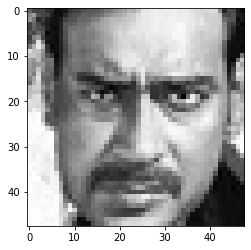

In [ ]:
plt.imshow(img_array)

In [ ]:
Datadirectory="Training1/"
Datadirectory_test="Testing/"

In [ ]:
Classes=["0","1","2","3","4","5","6"]

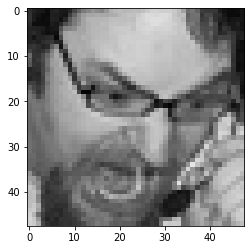

In [ ]:
# Merging the Data directory to the classses using os to get all the images.
for category in Classes:
    path=os.path.join(Datadirectory_test,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

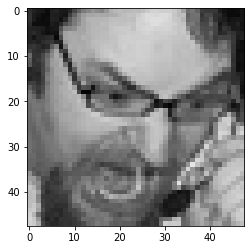

In [ ]:
img_size=48
new_array=cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
new_array.shape

(48, 48, 3)

# **Method 1: Directly Using DeepFace**

In [ ]:
# Installing DeepFace
pip install deepface

     |████████████████████████████████| 61kB 4.7MB/s 
     |████████████████████████████████| 2.3MB 12.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-3.12.2-cp37-none-any.whl size=9693 sha256=12f2060ffeeec1093aa117dea3e3661cf336a10a1a515cf32e48cdda635da1e7
  Stored in directory: /root/.cache/pip/wheels/81/d0/d7/d9983facc6f2775411803e0e2d30ebf98efbf2fc6e57701e09
Successfully built gdown
  Found existing installation: gdown 3.6.4
    Uninstalling gdown-3.6.4:
      Successfully uninstalled gdown-3.6.4


In [ ]:
# Upload A file from local Drive
from google.colab import files
uploaded = files.upload()

Saving portrait-young-angry-man-260nw-157245086.jpg to portrait-young-angry-man-260nw-157245086.jpg


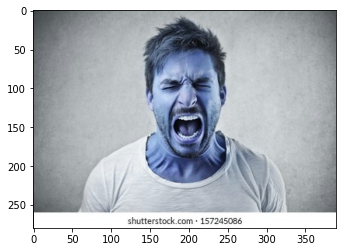

In [ ]:
# Image Show
import cv2
import matplotlib.pyplot as plt
img_array=cv2.imread("portrait-young-angry-man-260nw-157245086.jpg")
plt.imshow(img_array)

In [ ]:
# Analyze Image using DeepFace
from deepface import DeepFace
obj = DeepFace.analyze(img_path = "portrait-young-angry-man-260nw-157245086.jpg", actions = ['age', 'gender', 'race', 'emotion'])
print(obj["age"]," years old ",obj["dominant_race"]," ",obj["dominant_emotion"]," ", obj["gender"])

Directory  /root /.deepface created
Directory  /root /.deepface/weights created
facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://drive.google.com/uc?id=13iUHHP3SlNg53qSuQZDdHDSDNdBP9nwy
To: /root/.deepface/weights/facial_expression_model_weights.zip
5.54MB [00:00, 27.2MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://drive.google.com/uc?id=1YCox_4kJ-BYeXq27uUbasu--yz28zUMV
To: /root/.deepface/weights/age_model_weights.h5
539MB [00:12, 42.5MB/s]


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://drive.google.com/uc?id=1wUXRVlbsni2FN9-jkS_f4UTUrm1bRLyk
To: /root/.deepface/weights/gender_model_weights.h5
537MB [00:14, 38.4MB/s]


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://drive.google.com/uc?id=1nz-WDhghGQBC4biwShQ9kYjvQMpO6smj
To: /root/.deepface/weights/race_model_single_batch.zip
511MB [00:04, 125MB/s]
Action: emotion: 100%|██████████| 4/4 [00:04<00:00,  1.14s/it]

31  years old  middle eastern   happy   Man


**Remarks :**
* The actual emotion in the  Picture above is ANGRY Face but using DeepFace I found the prediction is HAPPY.
* It's Better to train my own model.